In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [119]:
data_b_NO2=pd.read_excel("/content/NO_Data.xlsx",sheet_name='London')

In [120]:
check=pd.read_excel("/content/check.xlsx")

In [121]:
df_b_NO2=data_b_NO2.groupby('Year').agg(NO_London=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,NO_London
0,2000,51.647059
1,2001,45.888889
2,2002,37.500000
3,2003,39.823529
4,2004,34.777778


In [122]:
year=df_b_NO2['Year']
y_test=df_b_NO2['NO_London']

In [123]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [124]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [125]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [127]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [128]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [129]:
y_pred = svm_classifier.predict(X_test)

In [130]:
y_pred

array(['High', 'High', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Low', 'Low',
       'Low'], dtype=object)

In [131]:
df_b_NO2

,Year,NO_London
0,2000,51.647059
1,2001,45.888889
2,2002,37.500000
3,2003,39.823529
4,2004,34.777778
5,2005,34.333333
6,2006,31.888889
7,2007,31.789474
8,2008,31.545455
9,2009,31.454545


In [132]:
classified_df=pd.DataFrame()

In [133]:
classifed_df=df_b_NO2[['Year','NO_London']]

In [134]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [135]:
classifed_df

,Year,NO_London,Checkpoints
0,2000,51.647059,High
1,2001,45.888889,High
2,2002,37.500000,Moderate
3,2003,39.823529,Moderate
4,2004,34.777778,Moderate
5,2005,34.333333,Moderate
6,2006,31.888889,Moderate
7,2007,31.789474,Moderate
8,2008,31.545455,Moderate
9,2009,31.454545,Moderate


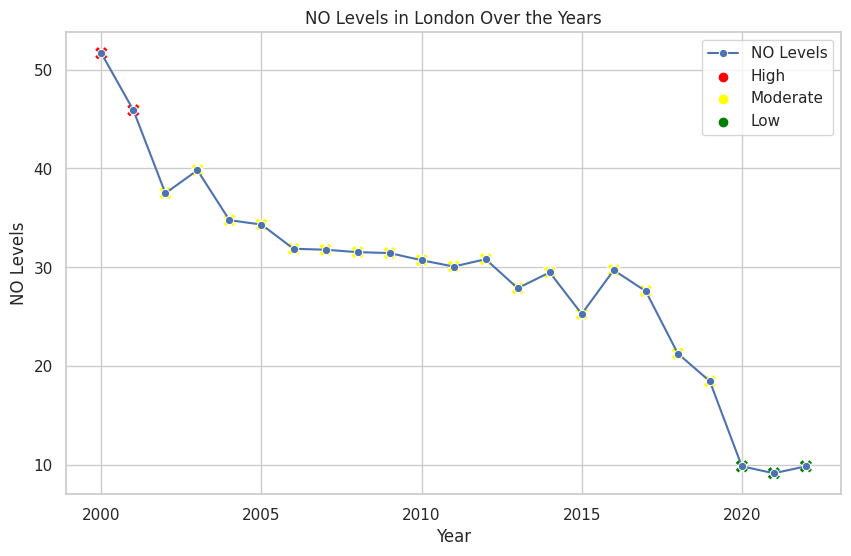

In [138]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='NO_London', data=classifed_df, marker='o', label='NO Levels')
sns.scatterplot(x='Year', y='NO_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['red', 'yellow','green'])
plt.xlabel('Year')
plt.ylabel('NO Levels')
plt.title('NO Levels in London Over the Years')
plt.legend()
plt.show()


In [139]:
from google.colab import files

In [140]:
csv_file_path = '/content/classified_London_NO.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [141]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>